In [ ]:
sentence= "Hello we are mallareddy university. It was a great exprience % to observe and talk to people !"

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import re
pattern=r"\w+"
text="hey 007 is the jersy number of dhoni"
output_pattern=re.match(pattern,text)
output_pattern

<re.Match object; span=(0, 3), match='hey'>

In [ ]:
import re
pattern=r"\d+"
text="hey 009 is the 008 jersy number of dhoni"
output_pattern=re.search(pattern,text)
print(output_pattern.group())

009


In [ ]:
from ast import match_case
import re
pattern=r"\d+"
text="hey 009 is the 008 jersy number of dhoni"
mat=re.findall(pattern,text)
print(mat)

['009', '008']


In [ ]:
import re
from bs4 import BeautifulSoup

def clean_text(text):

    emails = re.findall(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', text)

    hashtags = re.findall(r'#\w+', text)

    text_without_html = BeautifulSoup(text, "html.parser").get_text()

    text_without_numbers = re.sub(r'\d+', '', text_without_html)

    cleaned_text = re.sub(r'\s+', ' ', text_without_numbers).strip()

    return {
        'Emails Found': emails,
        'Hashtags Found': hashtags,
        'Cleaned Text': cleaned_text
    }

text = """
Hello world! Contact us at info@example.com or support123@company.org. Follow us on social media: #AI #MachineLearning.
Visit <a href="http://example.com">our website</a> for more details. This is a test with number 1234.
"""

result = clean_text(text)
print(f"Emails Found: {result['Emails Found']}")
print(f"Hashtags Found: {result['Hashtags Found']}")
print(f"Cleaned Text: {result['Cleaned Text']}")


Emails Found: ['info@example.com', 'support123@company.org']
Hashtags Found: ['#AI', '#MachineLearning']
Cleaned Text: Hello world! Contact us at info@example.com or support@company.org. Follow us on social media: #AI #MachineLearning. Visit our website for more details. This is a test with number .


In [ ]:
import re  # Importing the 're' module

text = """
Hello world! Contact us at info@example.com or support123@company.org. Follow us on social media: #AI #MachineLearning.
visit <a href="http://example.com">our website</a> for more details. This is a test with number 1234.
"""

emails = re.findall(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9,-]+\.[a-zA-Z]{2,}', text) # Now 're' is recognized
print(emails)

['info@example.com', 'support123@company.org']


In [ ]:
import pandas as pd # Importing the pandas library and assigning it the alias 'pd'

dataset = "http://data.insideairbnb.com/canada/on/toronto/2023-03-09/data/listings.csv.gz"
df = pd.read_csv(dataset) # Now 'pd' is recognized and the code should work

In [ ]:
import pandas as pd

text = ['sarah lives in a hut in the village.',
       'she has an apple tree in her backyard.',
       'The apples are red in color.']

df = pd.DataFrame(text, columns=['Sentence'])

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
token = []
pos = []
for sent in nlp.pipe(df['Sentence']):
  if sent.has_annotation('DEP'):
    token.append([word.text for word in sent])
    pos.append([word.pos_ for word in sent])

In [ ]:
token

[['sarah', 'lives', 'in', 'a', 'hut', 'in', 'the', 'village', '.'],
 ['she', 'has', 'an', 'apple', 'tree', 'in', 'her', 'backyard', '.'],
 ['The', 'apples', 'are', 'red', 'in', 'color', '.']]

In [ ]:
pos

[['PROPN', 'VERB', 'ADP', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'PUNCT'],
 ['PRON', 'VERB', 'DET', 'NOUN', 'NOUN', 'ADP', 'PRON', 'NOUN', 'PUNCT'],
 ['DET', 'NOUN', 'AUX', 'ADJ', 'ADP', 'NOUN', 'PUNCT']]

In [ ]:
df.head()

,Sentence
0,sarah lives in a hut in the village.
1,she has an apple tree in her backyard.
2,The apples are red in color.


In [ ]:
# Add the 'pos' and 'token' lists as columns to your DataFrame
df['pos'] = pos
df['token'] = token

# Now you can proceed with counting POS tags
df['noun'] = df['pos'].apply(lambda x: x.count('NOUN'))
df['verb'] = df['pos'].apply(lambda x: x.count('VERB'))
df['adj'] = df['pos'].apply(lambda x: x.count('ADJ'))
df['punct'] = df['pos'].apply(lambda x: x.count('PUNCT'))

# Display the updated DataFrame
df

,Sentence,pos,token,noun,verb,adj,punct
0,sarah lives in a hut in the village.,"[PROPN, VERB, ADP, DET, NOUN, ADP, DET, NOUN, ...","[sarah, lives, in, a, hut, in, the, village, .]",2,1,0,1
1,she has an apple tree in her backyard.,"[PRON, VERB, DET, NOUN, NOUN, ADP, PRON, NOUN,...","[she, has, an, apple, tree, in, her, backyard, .]",3,1,0,1
2,The apples are red in color.,"[DET, NOUN, AUX, ADJ, ADP, NOUN, PUNCT]","[The, apples, are, red, in, color, .]",2,0,1,1


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
True

True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))
tokens = sent_tokenize(text)
for i in tokens:
  words = nltk.word_tokenize(i)
  words = [w for w in words if not w in stop_words]
  tags = nltk.pos_tag(words)
  print(tags)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
import spacy

# Load the SpaCy model (English)
nlp = spacy.load("en_core_web_sm")

# Define the sentence
sentence = "NLP is amazing and fun to learn."

# Process the sentence
doc = nlp(sentence)

# Print the part-of-speech tags for each word in the sentence
for token in doc:
    print(f'{token.text}: {token.pos_}')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!mkdir data # Create the data directory if it does not exist
!wget -P data/ https://raw.githubusercontent.com/jalajthanaki/NLPCourse/master/data/tripadvisor_hotel_reviews.csv # Download the dataset into the data directory

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('tripadvisor_hotel_reviews.csv') # Use the updated path
df.head()

In [ ]:
def ratings(rating):
  if rating>3 and rating<=5:
    return 'Positive'
  elif rating>0 and rating<=3:
    return 'Negative'

In [ ]:
plt.pie(df['Rating'].value_counts(),

        labels=df['Rating'].unique().tolist(),
        autopct='%1.1f%%')
plt.show()

df['Length'] = df['Review'].str.len()
df.head()

In [ ]:
word_count = df["Review"] [0].split()
print(f'word count in a sample reviwe: {len(word_count)}')

In [ ]:
def word_count(review):
  review_list = review.split()
  return len(review_list)

In [ ]:
df['word_count'] = df['Review'  ].apply(word_count)
df.head()

In [ ]:
df['mean_word_length'] = df['Review'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
df.head()

In [ ]:
df['mean_sent_length'] = df['Review'].map(lambda rev: np.mean([len(sent) for sent in sent_tokenize(rev)]))

In [ ]:
features = df.columns.tolist()[2:]
df = df.drop(features, axis=1)
df.head()

In [ ]:
import re
from nltk.corpus import stopwords
def clean(review) :
  review = review.lower()
  review = re.sub('[^a-z A-Z 0-9-]+', '', review)
  review = " ".join([word for word in review.split() if word not in stopwords.words('english')])
  return review

In [ ]:
def corpus(text):
    text_list = text.split()
    return text_list

In [ ]:
df ['Review_lists'] = df       ['Review'].apply(corpus)
df.head()

In [ ]:
 from tqdm import trange
 corpus = []
 for i in trange(df.shape[0], ncols=150, nrows=10,
                 colour='green', smoothing=0.8):
   corpus += df['Review_lists'][i]
len(corpus)

In [ ]:
doc_trump = "Mr.Trump became president after  winnng the poltical elections.\nThrough he lost the support of some republican friends, Trum is friends with president putin"
doc_election = "President Trump says putin had no poltical interference is the elections outcome.\nHe says it was a withchhunt by poltical parties.\nHe claimed president putin is a frined who had nothing to do with the election"
doc_putin = """Post elections, valdimir putin became president of russia.
President putin had served as the prime Minister earlier in his poltical career""" # Use triple quotes to define multiline strings
documents = [doc_trump, doc_election, doc_putin]

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix,
                  columns=count_vectorizer.get_feature_names_out(),
                  index=['doc_trump', 'doc_election', 'doc_putin'])
df

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df, df))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
A = np.array([7,3])
B = np.array([3,7])
import numpy as np
import matplotlib.pyplot as plt
A = np.array([7,3])
B = np.array([3,7])
ax =plt.axes()
ax.arrow(0.0, 0.0, A[0], A[1], head_width=0.4, head_length=0.50)
plt.annotate(f"A({A[0]},{A[1]})",xy=(A[0],A[1]),xytext=(A[0]+0.5,A[1]))
ax.arrow(0.0, 0.0, B[0], B[1], head_width=0.4, head_length=0.50)
plt.annotate(f"B({B[0]},{B[1]})",xy=(B[0],B[1]),xytext=(B[0]+0.5,B[1]))
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()
plt.close()
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()
plt.close()


In [ ]:
cos_sim = np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))
print(f"Cosine Similarity between A and B: {cos_sim}")
print(f"Angle between A and B: {1-cos_sim}")

In [ ]:
A = {1,2,3,4,6}
B = {1,2,5,8,9}
#and | operation
C = A.intersection(B)
D = A.union(B)
print('AnB =',C)
print('AUB =',D)
print('j(A,B)=',float(len(C))/float(len(D)))

In [ ]:
A = {1,2,3,4,6}
B = {1,2,5,8,9}
C = A.intersection()
D = A.union()
print('AnB =',C)
print('AUB =',D)
print('j(A,B)=',float(len(C))/float(len(D)))

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
responses = [
    "You can return an item within 7 days of purchase.",
    "Our return policy allows you to return items that are unopened and in their orginal condition.",
    "We offer free shipping on orders over $50.",
    "To track your order, you can visit the 'Order Tracking' page and enter your order number.",
    "Our customer support team is available from 9AM to 6PM, Monday tho\rough Friday."
]

In [ ]:
user_input = "How can  i track my order?"

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
all_texts = responses + [user_input]
tfidf_matrix = vectorizer.fit_transform(all_texts)

In [ ]:
user_vector = tfidf_matrix[-1]
response_vectors = tfidf_matrix[:-1]
cosine_similarities = cosine_similarity(user_vector, response_vectors)

In [ ]:
most_similar_idx = np.argmax(cosine_similarities)

NameError: name 'cosine_similarities' is not defined

In [ ]:
print(f"User Query: {user_input}")
print(f"Most relevant response: {responses[most_similar_idx]}")

NameError: name 'user_input' is not defined

In [ ]:
import io
import random
import string
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('popular',quiet=True) # for downloading packages
nltk.download('punkt')
nltk.download('wordnet')

In [ ]:
def response(user_response):
  robo_response=''
  sent_tokens.append(user_response)
  Tfidfvec = Tfidfvectorizer(tokenizer=LemNormalize, stop_words='english')
  tfidf = Tfidfvec.fit_transform(sent_tokens)
  vals = cosine_similarity(tfidf[-1], tfidf)
  idx=vals.argsort()[0][-2]
  flat = vals.flatten()
  flat.sort()
  req_tfidf = flat[-2]
  if(req_tfidf==0):
    robo_response=robo_response+"I am sorry! I don't understand you"
    return robo_response
  else:
    robo_response = robo_response+sent_tokens[idx]
    return robo_response


In [ ]:
flag=True
print("SABot: My namw is SABot. How can I assist you?. \
If you want to exit, type Bye!")
while(flag==True):
  user_response = input()
  user_response=user_response.lower()
  if(user_response!='bye'):
    if(user_response=='thanks' or user_response=='thank you' ):
      flag=False
      print("SABot: You are welcome...")
    else:
      if(greeting(user_response)!=None):
        print("SABot: "+greeting(user_response))
      else:
        print("SABot: ",end="")

SABot: My namw is SABot. How can I assist you?. If you want to exit, type Bye!
What is computer


NameError: name 'greeting' is not defined

In [1]:
sent = "Ram is studying at MallaReddy university in Hyderabad, India"

In [12]:
import nltk
# Download the 'punkt_tab' resource for the Punkt Sentence Tokenizer
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [23]:
!pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 7.1 MB/s eta 0:00:00


In [26]:
!pip install spacy
!python-m spacy download en_core_web_sm

/bin/bash: line 1: python-m: command not found


[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


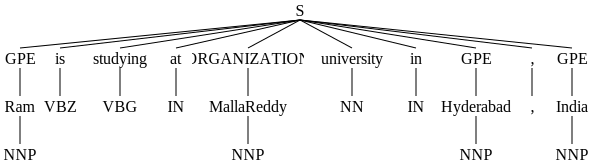

In [27]:
import nltk
from nltk import ne_chunk
from nltk.tokenize import word_tokenize

nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

sent = "Ram is studying at MallaReddy university in Hyderabad, India"

ne_chunk(nltk.pos_tag(word_tokenize(sent)), binary=False)

In [19]:
import nltk
from nltk import ne_chunk
from nltk.tokenize import word_tokenize

nltk.download('maxent_ne_chunker')
nltk.download('words')

sent = "Ram is studying at MallaReddy university in Hyderabad, India"


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [28]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(u'Apple is ready to launch new phone worth $10000 in New york time square')
for ent in doc.ents:
  print(ent.text,ent.start_char,ent.end_char, ent.label_)

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Apple 0 5 ORG
10000 42 47 MONEY
New york 51 59 GPE


In [29]:
text ="""
Elon Musk, the CEO of SpaceX and Tesla, announced the SpaceX's starship will bw launcging its first crewed mission to mars in 2027.
The mission, which will inlove astronauts from NASA, will be the first of its kind, and it will take place at kennedt Space Center in Florida.
Musk emphasized that the project would push the boundaries of dpace exploration.
"""

In [32]:
doc = nlp(text)
for ent in doc.ents:
  print(f"Entity: {ent.text};Label:{ent.label_}") # Change Label_ to label_

Entity: Elon Musk;Label:PERSON
Entity: SpaceX;Label:NORP
Entity: Tesla;Label:ORG
Entity: first;Label:ORDINAL
Entity: 2027;Label:DATE
Entity: NASA;Label:ORG
Entity: first;Label:ORDINAL
Entity: kennedt Space Center;Label:FAC
Entity: Florida;Label:GPE
